<a href="https://colab.research.google.com/github/Bal169/Amazon-Prime-Data-Analysis-using-Python/blob/main/Amazon_prime_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
amazon_prime_data = pd.read_csv('/content/amazon_prime_titles.csv')

# Display the first few rows of the dataset
print(amazon_prime_data.head())


  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, Interna

In [4]:
# Check for duplicate records
duplicate_rows = amazon_prime_data.duplicated()
if duplicate_rows.any():
    print("Duplicate records found. Removing duplicates.")
    amazon_prime_data = amazon_prime_data.drop_duplicates()
else:
    print("No duplicate records found.")


No duplicate records found.


Null values found. Displaying heatmap.


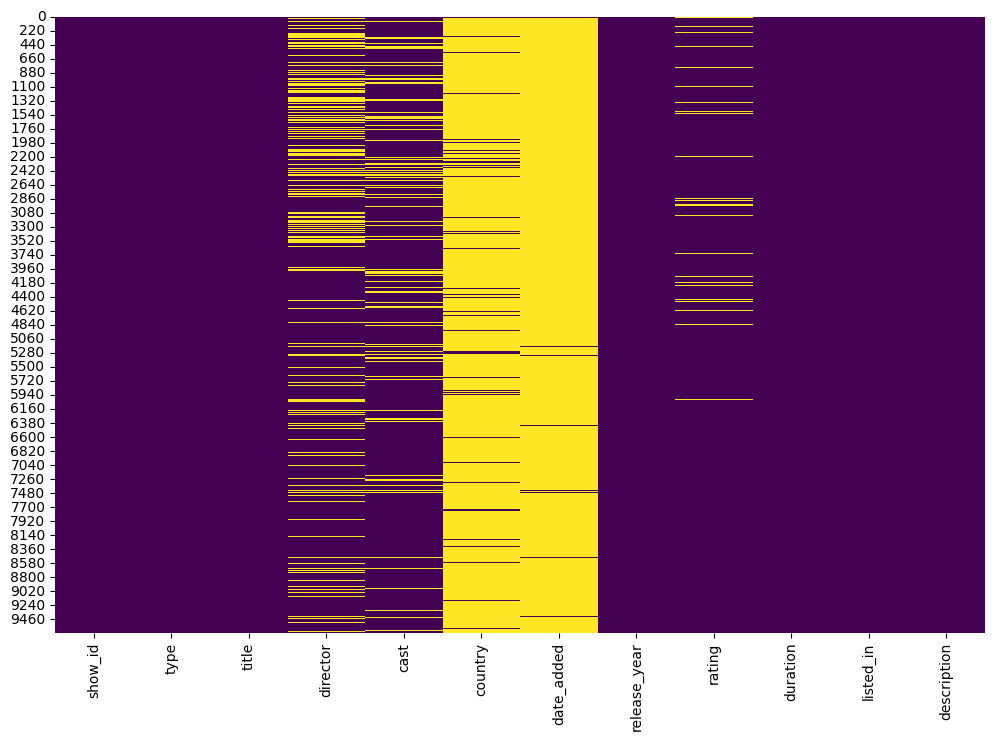

In [5]:
# Check for null values
null_values = amazon_prime_data.isnull()
if null_values.any().any():
    print("Null values found. Displaying heatmap.")
    plt.figure(figsize=(12, 8))
    sns.heatmap(null_values, cmap='viridis', cbar=False)
    plt.show()
else:
    print("No null values found.")



For 'Mirzapur', what is the Show Id and Who is the Director of this show?

In [6]:
mirzapur_info = amazon_prime_data[amazon_prime_data['title'] == 'Mirzapur']
print("Show ID:", mirzapur_info['show_id'].values[0])
print("Director:", mirzapur_info['director'].values[0])


Show ID: s1652
Director: nan


In which year the highest number of TV Shows & Movies were released? Show with Bar Graph.

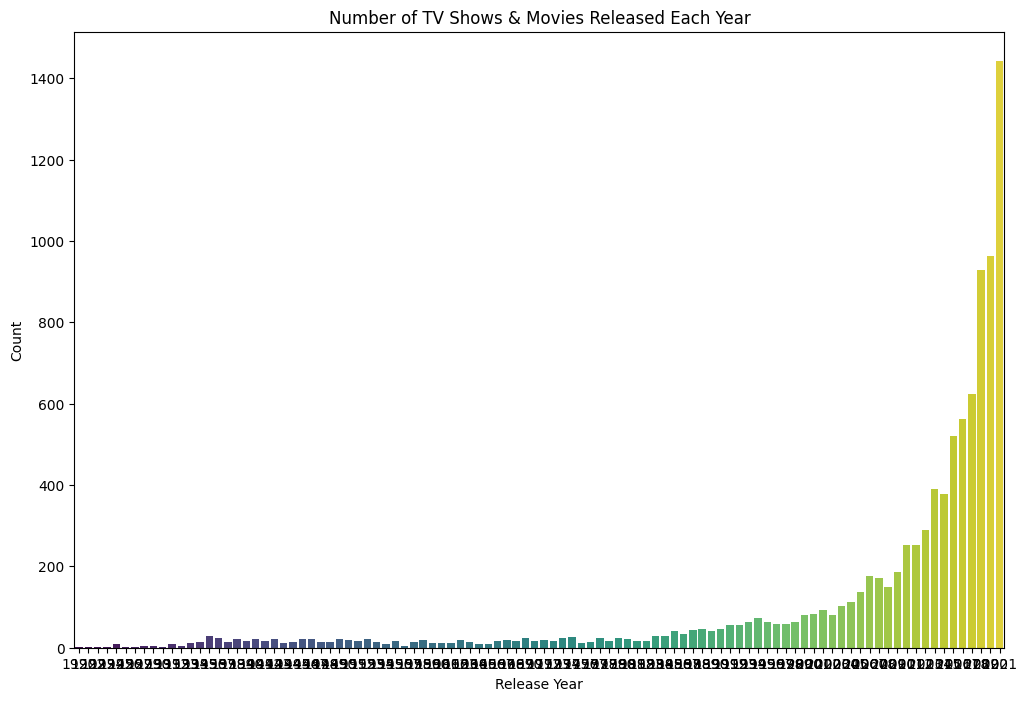

In [7]:
plt.figure(figsize=(12, 8))
sns.countplot(x='release_year', data=amazon_prime_data, palette='viridis')
plt.title("Number of TV Shows & Movies Released Each Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


How many Movies & TV Shows are in the dataset? Show with Bar Graph.

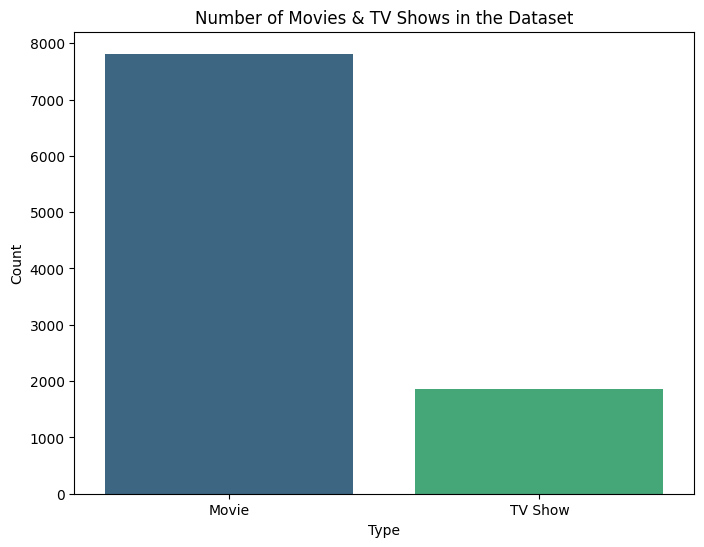

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=amazon_prime_data, palette='viridis')
plt.title("Number of Movies & TV Shows in the Dataset")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


Show all the Movies that were released in the year 2020.



In [9]:
movies_2020 = amazon_prime_data[(amazon_prime_data['release_year'] == 2020) & (amazon_prime_data['type'] == 'Movie')]
print("Movies released in 2020:")
print(movies_2020[['title', 'release_year']])


Movies released in 2020:
                                                  title  release_year
13                                           Resilencia          2020
73                              Words On Bathroom Walls          2020
150   Wash Your Hands & More Classic Kids Songs - Ki...          2020
161                                        Walkaway Joe          2020
167                                    Waiting for Anya          2020
...                                                 ...           ...
9513                                     A Stormy Night          2020
9528                              THE CHRISTMAS EDITION          2020
9555                                     DEAR CHRISTMAS          2020
9577                                  Surviving America          2020
9619                                    The Shadow Side          2020

[736 rows x 2 columns]


Show only the Titles of all TV Shows that were released in India only.



In [11]:
indian_tv_shows = amazon_prime_data[(amazon_prime_data['country'] == 'India') & (amazon_prime_data['type'] == 'TV Show')]
print("TV Shows released in India:")
print(indian_tv_shows['title'])



TV Shows released in India:
469                                   The Remix
814                                      Tandav
937     Sons of the Soil : Jaipur Pink Panthers
1397                                 Paatal Lok
1420                              One Mic Stand
1651                                   Mirzapur
1748                                Man's World
1774                             Made In Heaven
2032                        Jestination Unknown
2102                                Inside Edge
2434                    Four More Shots Please!
2802                 Comicstaan Semma Comedy Pa
2803                                 Comicstaan
3154                         Bang Baaja Baaraat
3156                            Bandish Bandits
5197                             The Family Man
Name: title, dtype: object


Show Top 10 Directors who gave the highest number of TV Shows & Movies to Amazon Prime.

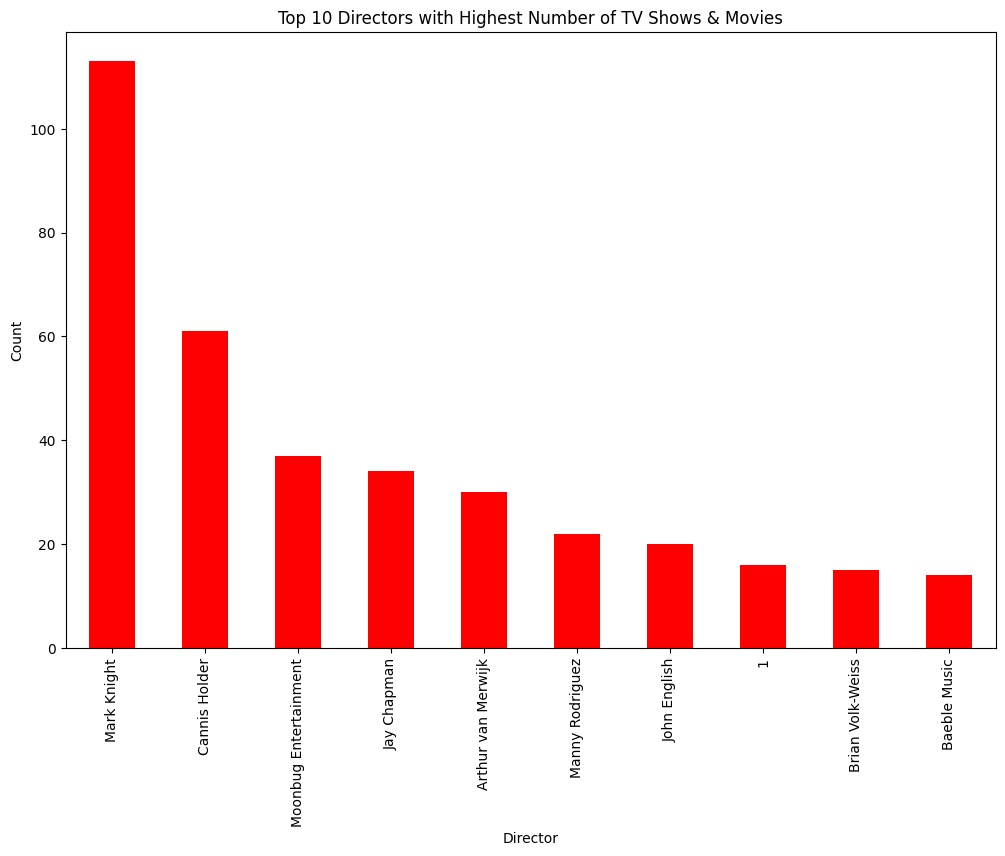

In [13]:
top_directors = amazon_prime_data['director'].value_counts().head(10)
plt.figure(figsize=(12, 8))
top_directors.plot(kind='bar', color='red')
plt.title("Top 10 Directors with Highest Number of TV Shows & Movies")
plt.xlabel("Director")
plt.ylabel("Count")
plt.show()


Show all the Records where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [14]:
comedy_uk_records = amazon_prime_data[
    ((amazon_prime_data['listed_in'].str.contains('Comedies')) & (amazon_prime_data['type'] == 'Movie')) |
    (amazon_prime_data['country'] == 'United Kingdom')
]
print("Records where Category is Movie and Type is Comedies or Country is United Kingdom:")
print(comedy_uk_records)


Records where Category is Movie and Type is Comedies or Country is United Kingdom:
     show_id     type                              title  \
4         s5    Movie                      Monster Maker   
5         s6    Movie              Living With Dinosaurs   
14       s15    Movie  Elon Musk: The Real Life Iron Man   
374     s375    Movie                    The Zombie King   
656     s657    Movie                           The Flaw   
821     s822  TV Show         Take Us Home: Leeds United   
892     s893    Movie                          Stick Man   
2059   s2060  TV Show        James May: Our Man in Japan   
2060   s2061  TV Show                 James May: Oh Cook   
2095   s2096    Movie                      Instant Death   
2364   s2365    Movie                         Get Duked!   
2381   s2382    Movie                          Gascoigne   
2462   s2463  TV Show                            Fleabag   
2534   s2535    Movie                   Everybody's Game   
2809   s2810    M

In how many movies/shows, Pankaj Tripathi was cast?

In [15]:
pankaj_tripathi_count = amazon_prime_data[amazon_prime_data['cast'].str.contains('Pankaj Tripathi', na=False)].shape[0]
print("Number of movies/shows where pankaj tripathi was cast:", pankaj_tripathi_count)


Number of movies/shows where pankaj tripathi was cast: 10


What are the different Ratings defined by Amazon Prime?



In [16]:
unique_ratings = amazon_prime_data['rating'].unique()
print("Different Ratings defined by Amazon Prime:")
print(unique_ratings)


Different Ratings defined by Amazon Prime:
[nan '13+' 'ALL' '18+' 'R' 'TV-Y' 'TV-Y7' 'NR' '16+' 'TV-PG' '7+' 'TV-14'
 'TV-NR' 'TV-G' 'PG-13' 'TV-MA' 'G' 'PG' 'NC-17' 'UNRATED' '16' 'AGES_16_'
 'AGES_18_' 'ALL_AGES' 'NOT_RATE']


How many Movies got the 'TV-14' rating, in Canada?

In [17]:
tv_14_canada_count = amazon_prime_data[(amazon_prime_data['rating'] == 'TV-14') & (amazon_prime_data['country'] == 'Canada')].shape[0]
print("Number of Movies with 'TV-14' rating in Canada:", tv_14_canada_count)


Number of Movies with 'TV-14' rating in Canada: 0


How many TV Shows got the 'R' rating, after the year 2018?

In [18]:
r_rating_after_2018_count = amazon_prime_data[(amazon_prime_data['rating'] == 'R') & (amazon_prime_data['release_year'] > 2018) & (amazon_prime_data['type'] == 'TV Show')].shape[0]
print("Number of TV Shows with 'R' rating after 2018:", r_rating_after_2018_count)


Number of TV Shows with 'R' rating after 2018: 0


What is the maximum duration of a Movie/Show on Amazon Prime?

In [19]:
max_duration = amazon_prime_data['duration'].max()
print("Maximum duration of a Movie/Show on Amazon Prime:", max_duration)


Maximum duration of a Movie/Show on Amazon Prime: 99 min


Which individual country has the Highest No. of TV Shows?

In [20]:
tv_shows_by_country = amazon_prime_data[amazon_prime_data['type'] == 'TV Show']
highest_tv_shows_country = tv_shows_by_country['country'].value_counts().idxmax()
print("Country with the Highest Number of TV Shows:", highest_tv_shows_country)


Country with the Highest Number of TV Shows: United States


Sort the dataset by Year

In [21]:
sorted_by_year = amazon_prime_data.sort_values(by='release_year')
print("Dataset sorted by Year:")
print(sorted_by_year)


Dataset sorted by Year:
     show_id   type                   title                director  \
83       s84  Movie        Within Our Gates          Oscar Micheaux   
1284   s1285  Movie               Pollyanna             Paul Powell   
1474   s1475  Movie     Nomads Of The North          David Hartford   
1143   s1144  Movie     Robin Hood (Silent)              Allan Dwan   
1425   s1426  Movie      One Exciting Night           D.W. Griffith   
...      ...    ...                     ...                     ...   
8542   s8543  Movie  Last Patrol on Okinawa             Nick Brokaw   
5164   s5165  Movie         Unlawful Duties          Sunil Kulkarni   
8540   s8541  Movie                Lockdown  LANCELOT ODUWA IMASUEN   
6180   s6181  Movie       Krishna mukundham                   Badri   
8779   s8780  Movie          Bad Detectives           Presley Paras   

                                                   cast country date_added  \
83                           Evelyn Preer, Fl

Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV.

In [22]:
dramas_kids_tv_instances = amazon_prime_data[
    ((amazon_prime_data['listed_in'].str.contains('Dramas')) & (amazon_prime_data['type'] == 'Movie')) |
    ((amazon_prime_data['listed_in'].str.contains('Kids TV')) & (amazon_prime_data['type'] == 'TV Show'))
]
print("Instances where Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV:")
print(dramas_kids_tv_instances)


Instances where Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV:
Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []
